In [2]:
import pandas as pd

In [3]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


In [4]:
import geopandas

In [5]:
pip install pysal

Note: you may need to restart the kernel to use updated packages.


In [6]:
from pysal.lib import weights

In [7]:
import matplotlib.pyplot as plt

### Shapefile of England MSOAs

In [8]:
shapes = geopandas.read_file('MSOA_2021_EW_BFE_V7.shp')

In [9]:
shapes.head()

,MSOA21CD,MSOA21NM,BNG_E,BNG_N,LONG,LAT,GlobalID,geometry
0,E02000001,City of London 001,532384,181355,-0.093490,51.5156,1a2c7a3b-631d-4efc-8ddc-b1c4d354fb0d,"POLYGON ((532153.703 182165.155, 532158.25 182..."
1,E02000002,Barking and Dagenham 001,548267,189685,0.138756,51.5865,5a46ef58-9e06-4afd-9a7d-d299d2e522d3,"POLYGON ((548881.304 190819.98, 548881.125 190..."
2,E02000003,Barking and Dagenham 002,548259,188520,0.138149,51.5760,780f3795-87fd-498e-b117-7e8361f3587d,"POLYGON ((548958.555 189072.176, 548954.517 18..."
3,E02000004,Barking and Dagenham 003,551004,186412,0.176828,51.5564,2a558db9-3725-46e7-9cbd-348766244e71,"POLYGON ((551550.056 187364.705, 551528.633 18..."
4,E02000005,Barking and Dagenham 004,548733,186824,0.144267,51.5607,f09f3af8-753a-433b-ae45-5a3d0281f34d,"POLYGON ((549237.051 187627.941, 549241.319 18..."


In [10]:
shapes.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 7264 entries, 0 to 7263
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   MSOA21CD  7264 non-null   object  
 1   MSOA21NM  7264 non-null   object  
 2   BNG_E     7264 non-null   int64   
 3   BNG_N     7264 non-null   int64   
 4   LONG      7264 non-null   float64 
 5   LAT       7264 non-null   float64 
 6   GlobalID  7264 non-null   object  
 7   geometry  7264 non-null   geometry
dtypes: float64(2), geometry(1), int64(2), object(3)
memory usage: 454.1+ KB


In [11]:
london = pd.read_csv('LondonMSOAs.csv')

In [12]:
london.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26369 entries, 0 to 26368
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   MSOA21CD  26369 non-null  object
 1   MSOA21NM  26369 non-null  object
dtypes: object(2)
memory usage: 412.1+ KB


In [13]:
london.drop_duplicates(ignore_index = True, inplace= True)

In [14]:
london.head()

,MSOA21CD,MSOA21NM
0,E02000001,City of London 001
1,E02000017,Barking and Dagenham 016
2,E02000016,Barking and Dagenham 015
3,E02000010,Barking and Dagenham 009
4,E02000009,Barking and Dagenham 008


In [15]:
london.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   MSOA21CD  1002 non-null   object
 1   MSOA21NM  1002 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB


In [16]:
londoncodes = london[['MSOA21CD']]

In [17]:
londoncodes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   MSOA21CD  1002 non-null   object
dtypes: object(1)
memory usage: 8.0+ KB


In [18]:
gdf = shapes.merge(londoncodes, how = 'inner', on= 'MSOA21CD')

In [19]:
gdf.head()

,MSOA21CD,MSOA21NM,BNG_E,BNG_N,LONG,LAT,GlobalID,geometry
0,E02000001,City of London 001,532384,181355,-0.093490,51.5156,1a2c7a3b-631d-4efc-8ddc-b1c4d354fb0d,"POLYGON ((532153.703 182165.155, 532158.25 182..."
1,E02000002,Barking and Dagenham 001,548267,189685,0.138756,51.5865,5a46ef58-9e06-4afd-9a7d-d299d2e522d3,"POLYGON ((548881.304 190819.98, 548881.125 190..."
2,E02000003,Barking and Dagenham 002,548259,188520,0.138149,51.5760,780f3795-87fd-498e-b117-7e8361f3587d,"POLYGON ((548958.555 189072.176, 548954.517 18..."
3,E02000004,Barking and Dagenham 003,551004,186412,0.176828,51.5564,2a558db9-3725-46e7-9cbd-348766244e71,"POLYGON ((551550.056 187364.705, 551528.633 18..."
4,E02000005,Barking and Dagenham 004,548733,186824,0.144267,51.5607,f09f3af8-753a-433b-ae45-5a3d0281f34d,"POLYGON ((549237.051 187627.941, 549241.319 18..."


In [20]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   MSOA21CD  1002 non-null   object  
 1   MSOA21NM  1002 non-null   object  
 2   BNG_E     1002 non-null   int64   
 3   BNG_N     1002 non-null   int64   
 4   LONG      1002 non-null   float64 
 5   LAT       1002 non-null   float64 
 6   GlobalID  1002 non-null   object  
 7   geometry  1002 non-null   geometry
dtypes: float64(2), geometry(1), int64(2), object(3)
memory usage: 62.8+ KB


### Shapefile of London MSOAs

In [21]:
# Exporting file

gdf.to_file('London_MSOA.shp')

## Weights

In [22]:
# Generate W from the GeoDataFrame
# Spatial weights matrix with 4 nearest neighbours

wk = weights.KNN.from_dataframe(gdf, k=4)

# Row-standardization
#wk.transform = "R"

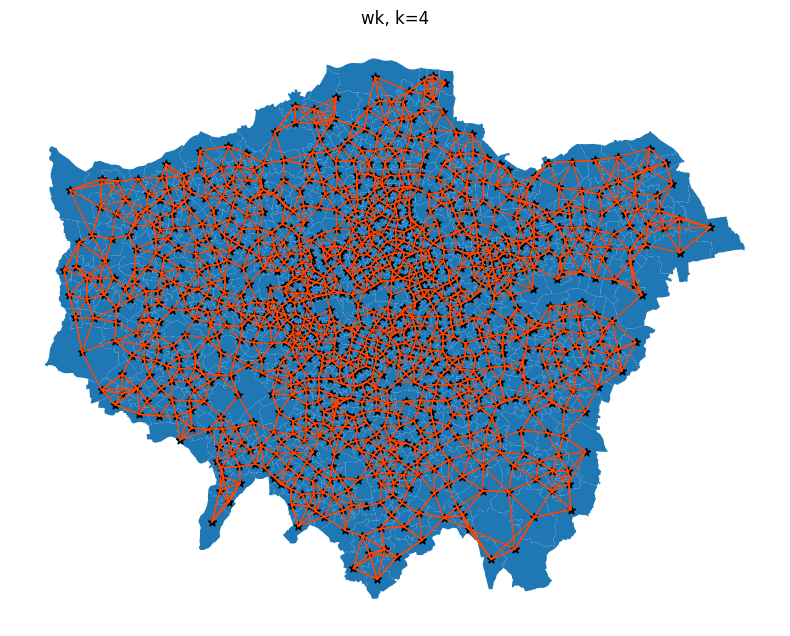

In [23]:
# Set up figure and axis
f, ax = plt.subplots(1, figsize=(8, 8))

gdf.plot(ax=ax)
wk.plot(gdf,
    edge_kws=dict(linewidth=1, color="orangered"),
    node_kws=dict(marker="*"),
    ax=ax,)
ax.set_axis_off()
ax.set_title("wk, k=4")

f.tight_layout()
plt.show()

In [24]:
wq = weights.contiguity.Queen.from_dataframe(gdf)

C:\Users\Ana Cuba\AppData\Local\Temp\ipykernel_19228\3053642957.py:1: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  wq = weights.contiguity.Queen.from_dataframe(gdf)


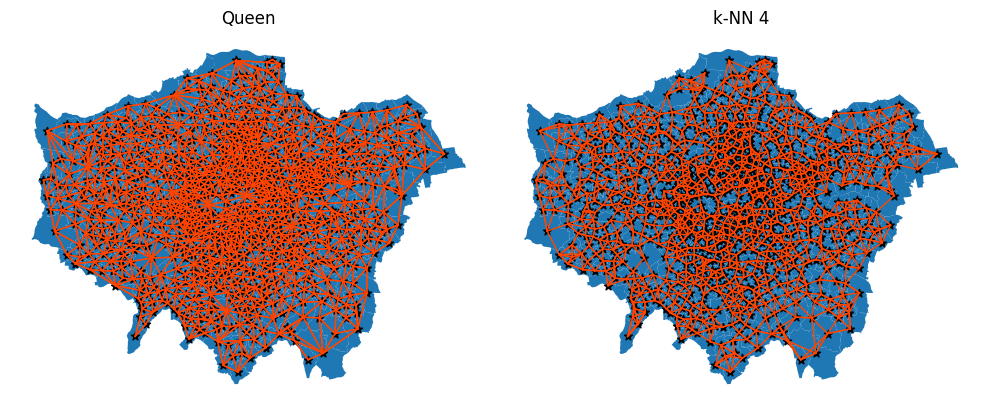

In [26]:
# Set up figure and axis
f, axs = plt.subplots(1, 2, figsize=(10, 6))

# Contiguity
ax = axs[0]
gdf.plot(ax=ax)
wq.plot(
    gdf,
    edge_kws=dict(linewidth=1, color="orangered"),
    node_kws=dict(marker="*"),
    ax=ax,
)
ax.set_axis_off()
ax.set_title("Queen")

# KNN
ax = axs[1]
gdf.plot(ax=ax)
wk.plot(
    gdf,
    edge_kws=dict(linewidth=1, color="orangered"),
    node_kws=dict(marker="*"),
    ax=ax,
)
ax.set_axis_off()
ax.set_title("k-NN 4")

f.tight_layout()
plt.show()

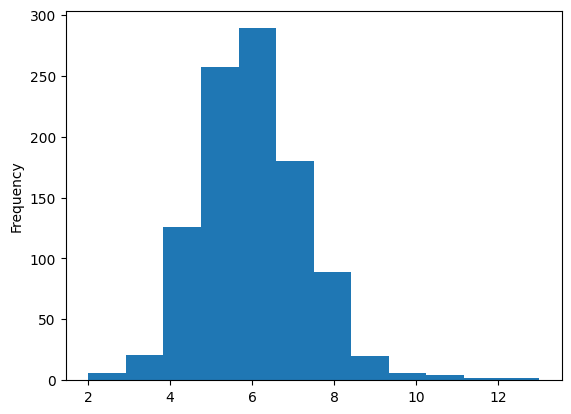

In [28]:
# Histogram of number neighbours with queen contiguity

s1 = pd.Series(wq.cardinalities)
s1.plot.hist(bins=s1.unique().shape[0]);

In [38]:
l1 = s1.tolist()

In [39]:
sum(l1) / len(l1)

5.892215568862276

Average number of neighbours with queen contiguity is almost 6

In [42]:
print("Minimum number of neighbours: ", min(l1))

Minimum number of neighbours:  2


In [43]:
print("Maximum number of neighbours: ", max(l1))

Maximum number of neighbours:  13
